In [1]:
import numpy as np
import scipy as scip
import sympy as sm
import ipywidgets as widgets
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
sym.init_printing(use_unicode=True)
from scipy import interpolate

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_{1}& = & \begin{cases}
w h_1 & 
\text{if }l_1 = 1  \\
b & \text{if }l_1 = 0 
\end{cases} \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

In order to do this assignment, packages are imported, and to the values we are given, the values of the function is defnied.

In [4]:
#Importing packages
from scipy import interpolate
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [5]:
#Defining solutions
def c(h,l,w,b):
    if l == 1:
        return  w*h*l
    elif l == 0:
        return  b

def utility(h,l,rho,gamma,w,b):
    return c(h,l,w,b)**(1-rho)/(1-rho) - gamma*l

def v2(h2,l2,rho,gamma,w,b):
    return utility(h2,l2,rho,gamma,w,b)

def v1(h1,l1,v2_interp,rho,gamma,w,b):
    
    #This is the result for low-skill
    h2_low = h1 + l1 
    v2_low = v2_interp([h2_low])[0]
     
    #This is the result for high-skill
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    #This is the expected value for v2
    v2 = 0.5*v2_low + 0.5*v2_high
    
    #This is the total value
    return utility(h1,l1,rho,gamma,w,b) + beta*v2

There is taken great inspiration from problem set 7 for this section

Now, that the functions have been defined, we move on to defining our solution functions

In [6]:
#Defining solutions
def solve_period_2(h_vec,rho,gamma,w,b):
    
    #Grids
    v2_vec =  np.empty(100)
    l2_vec = np.empty(100)
    v2_vec_unemp = np.empty(100)

    #Loops
    for i, h2 in enumerate(h_vec):
    
        
        if (v2(h2,1,rho,gamma,w,b) > v2(h2,0,rho,gamma,w,b)) == True: 
            l2_vec[i] = 1
        else:
            l2_vec[i] = 0
            
        #List
        v2_vec[i] = v2(h2,l2_vec[i],rho,gamma,w,b)
        v2_vec_unemp[i] = utility(h2,0,rho,gamma,w,b)
    
    return v2_vec, l2_vec, v2_vec_unemp

#Solve
v2_vec,l2_vec,v2_vec_unemp =  solve_period_2(h_vec,rho,gamma,w,b)

Now, we move on to plotting the function to see the utility of the worker, given the 

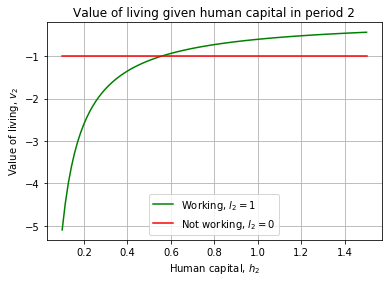

The graphs intersect at h ≥ 0.567


In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v2(h_vec,1,rho,gamma,w,b), color = "g")
ax.plot(h_vec, v2_vec_unemp, color = "r")
ax.grid()
ax.set_xlabel('Human capital, $h_2$')
ax.set_ylabel('Value of living, $v_2$')
ax.set_title('Value of living given human capital in period 2')
plt.legend(('Working, $l_2=1$','Not working, $l_2=0$'),loc='lower center')
plt.show()
index = np.where(l2_vec == 1)[0][0];
print('The graphs intersect at h ≥ ' + str(round(h_vec[index],3)))

As we see from the graph, the values the worker is affiliated for utility, is negative whether she is working or not. She does though receive less negative utility, to a higher skill level than the intersect point, 0.567.

Now, a different graph will be made, which is the labour supply in regard to the human capital.

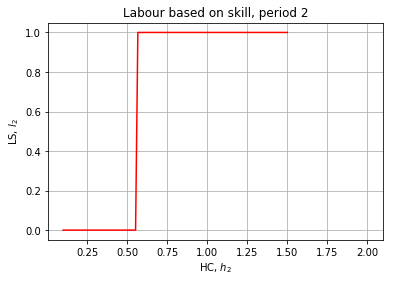

In [8]:
# Plotting LS as a function of HC, period 2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l2_vec,rho,gamma,w,b,color = "r")
ax.grid()
ax.set_xlabel('HC, $h_2$')
ax.set_ylabel('LS, $l_2$')
ax.set_title('Labour based on skill, period 2')
plt.show()

Here, the graph tells us, that if the worker is in posession of HC which is 0.55 or above, the worker will be motivated to work in the second period, which will provide the worker with a higher amount of utility. However, if the worker is not in enough posession of HC, she will not choose to work, and therefore will live on the unemployment benefits, since the disutility outweighs the utility of consumption.

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

As done in the first assignment, the solution functions will now be defined.

In [9]:
#Interpolator
v2_interp = interpolate.RegularGridInterpolator([h_vec],v2_vec,bounds_error=False,fill_value=None)

def solve_period_1(h_vec, v2_interp,rho,gamma,w,b):
    
    #Grids
    v1_vec =np.empty(100)
    l1_vec = np.empty(100)
    v1_vec_unemployed = np.empty(100)
    
    #Loop
    for i,h1 in enumerate(h_vec): 
        
        #Utility
        if (v1(h1,1,v2_interp,rho,gamma,w,b) > v1(h1,0,v2_interp,rho,gamma,w,b)) == True: 
            l1_vec[i] = 1
        else:
            l1_vec[i] = 0
            
        #List
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp,rho,gamma,w,b)
        v1_vec_unemployed[i] = utility(h1,0,rho,gamma,w,b)
    
    return v1_vec, l1_vec, v1_vec_unemployed

#Solve
v1_vec, l1_vec, v1_vec_unemployed =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)

Now, the labour supply function on HC, will be illustrated with a plot

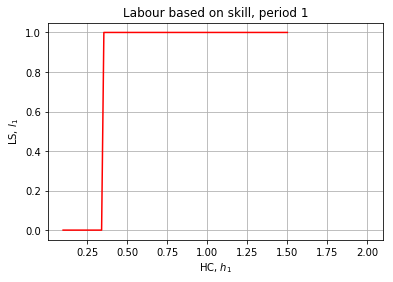

In [10]:
#LS as func of HC, periode 1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, l1_vec,rho,gamma,w,b,color = "r")
ax.grid()
ax.set_xlabel('HC, $h_1$')
ax.set_ylabel('LS, $l_1$')
ax.set_title('Labour based on skill, period 1')
plt.show()

Here, the graph tells us, that the skill level required to motivate the worker enough to want to work, is around 0.35. In addition, since the worker has a higher chance og evolving through working in the first period, it makes sense that a higher requirement is present in the second period, which was seen on the previous graphs.

Next up is illustrating the function, based on HC.

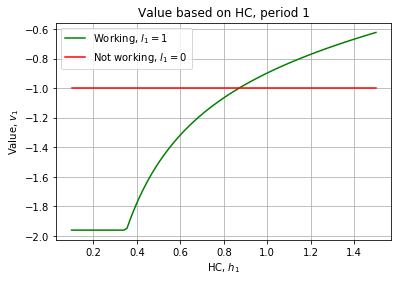

The graphs intersect at h ≥ 0.355


In [67]:
#Value based on HC
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec, v1_vec, color = "green")
ax.plot(h_vec,v1_vec_unemployed, color = 'red')
ax.grid()
ax.set_xlabel('HC, $h_1$')
ax.set_ylabel('Value, $v_1$')
ax.set_title('Value based on HC, period 1')
plt.legend(('Working, $l_1=1$','Not working, $l_1=0$'),loc='LC')
plt.show()
index = np.where(l1_vec == 1)[0][0];
print('The graphs intersect at h ≥ ' + str(round(h_vec[index],3)))

Here the graph tells us, that in order to motivate the worker to work, a level of human capital is required to be 0.355 or higher.

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

In order to answer this question, the effects of changing wage, chance of avoiding work, and the benefits available if choosing not to work for both periods will be investigated.

In [12]:
#Defining the function
def int_fig(w,b,gamma):

    #Implementing previous solutions
    v1_vec, l1_vec, v1_vec_unemployed =  solve_period_1(h_vec, v2_interp,rho,gamma,w,b)
    v2_vec,l2_vec, v2_vec_unemployed =  solve_period_2(h_vec,rho,gamma,w,b)

    #Setting baseline for the illustration
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2,  ncols=2, sharex=True, figsize=(16,12))
    
    #Period 1
    ax1.plot(h_vec,v1_vec_unemployed, label='Utility if $l_1=0$', color = 'green')
    ax1.plot(h_vec,v1_vec, label='Utility if $l_1=1$', color = 'red')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('HC, $h_1$')
    ax1.set_ylabel('Value, $v_1$')
    ax1.set_title('Value, period 1');

    #HC/LS, period 1
    ax2.plot(h_vec,l1_vec, label='LS',color = "r")
    ax2.grid()
    ax2.set_xlabel('HC, $h_1$')
    ax2.set_ylabel('LS, $l_1$')
    ax2.set_title('LS based on HC, period 1');
    
    #Value, period 2
    ax1.plot(h_vec,v2_vec_unemp, label='Utility if $l_2=0$', color = 'green')
    ax3.plot(h_vec,v2_vec, label='Utility if $l_2=1$', color = 'red')
    ax3.grid()
    ax3.legend(loc='lower right')
    ax3.set_xlabel('HC, $h_2$')
    ax3.set_ylabel('Value, $v_2$')
    ax3.set_title('Value, period 2');

    #HC/LS, period 2
    ax4.plot(h_vec,l2_vec, label='Labor supply',color = "r")
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('HC, $h_2$')
    ax4.set_ylabel('LS, $l_2$')
    ax4.set_title('LS based on HC, period 2');

# Widgets for the chosen parameters
widgets.interact(int_fig,
    b = widgets.FloatSlider(value=1,description='Unemployment benefits', min=0.1,max=5, step=0.1, ),
    w = widgets.FloatSlider(value=2,description='Wage rate',min=0.1,max=5, step=0.1,),
    gamma = widgets.FloatSlider(value=0.1,description='Aversion to work', min=0,max=5, step=0.1,));

interactive(children=(FloatSlider(value=2.0, description='Wage rate', max=5.0, min=0.1), FloatSlider(value=1.0…

Its not impossible, that the worker chooses not to work in both of the periods, since the difference between the benefits gained from not working, and working not differ enough. This is also quite intuitive. However, a situation where the benefits grant a higher wage than gained from working, and the worker till chooses to work, would be possible if to achieve a high level of HC.
Therefore, in conclusion, there is no concrete result. If the worker chooses to work or not, relies on the levels of wages, the benefits, and the disutility/utility.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [13]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.


In order to solve the equilibrium values, the symbols are defined.

In [14]:
#Definig symbols
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')
gamma = sm.symbols('gamma')
r= sm.symbols('r')
vt= sm.symbols('v_t')
yt= sm.symbols('y_t')
pi= sm.symbols('pi')
phi= sm.symbols('phi')
st= sm.symbols('s_t')
pit_1= sm.symbols('pi_t-1')
yt_1=sm.symbols('y_t-1')
st_1=sm.symbols('s_t-1')

Next, is the definition of AD and SRAS

In [15]:
#Defining
AD= (1/(h*alpha))*(vt-(yt*(1+b*alpha)))
SRAS=pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)

Now, we implement the possibility of printing results out in the document

In [16]:
#Printing
sm.init_printing(use_unicode=True) 

In [17]:
AD1=(1/(par['h']*par['alpha']))*(vt-(yt*(1+par['b']*par['alpha'])))
AD1

In [18]:
SRAS1=pit_1+(par['gamma']*yt)-(par['phi']*par['gamma']*yt_1)+st+(par['phi']*st_1)
SRAS1

The short term equilibrium is dependant on the aggregated supply, which in this case is equal to the aggregated demand. This means, that when we set those two factors equal to one another, and solve for y, we will find the output of the equilibrium.

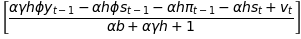

In [19]:
#Output
AD_SRAS=sm.Eq(AD,SRAS)
ytstar=sm.solve(AD_SRAS, yt)
ytstar

To solve the inflation, the recently acquired AD y* is inserted

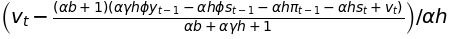

In [20]:
#Inflation
pitstar = 1/(h*alpha)*(vt-(1+b*alpha)*ytstar[0])
pitstar

In [21]:
#Output 
AD1_SRAS1=sm.Eq(AD1,SRAS1)
ytstar1=sm.solve(AD1_SRAS1, yt)
ytstar1

In [22]:
#Inflation
pitstar1 = 1/(par['h']*par['alpha'])*(vt-(1+par['b']*par['alpha'])*ytstar1[0])
pitstar1

Now, we can conclude that the equilibrium output and the inflation hereof is depoendant on the inflation in the previous periods, and on whether the demand or supply effects have caused any disturbance.

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

To do this, $y_t$,  and $\pi_t$ is solved for numerically.

In [23]:
#Defining the function
yt_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), ytstar[0])

In [24]:
#Defining the function
pit_eq = sm.lambdify((alpha,h,b,phi,gamma,vt,st,pit_1,yt_1,st_1), pitstar)

Now, as we know gamma is equal to 0.075, we can now

In [25]:
#Output
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

In [26]:
#Inflation
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0, 0, 0, 0, 0)

As we want to see this illustrated, the AD an SRAS are defined as functions.

In [27]:
def ADcurve(h, alpha, yt, vt, b):
    return (1/(h*alpha))*(vt-(y*(1+b*alpha)))

def SRAScurve(pit_1, gamma, yt, yt_1, st, phi, st_1):
    return pit_1+(gamma*yt)-(phi*gamma*yt_1)+st+(phi*st_1)

Text(0, 0.5, '$\\pi_t$')

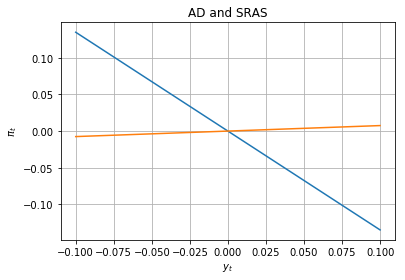

In [28]:
#Inserting values
y=np.linspace(-0.1,0.1,100)
AD_plot=ADcurve(0.5, 5.76, y, 0, 0.5)
SRAS_plot=SRAScurve(0, 0.075, y, 0, 0, 0, 0)

#Plotting
plt.plot(y,AD_plot,label='AD')
plt.plot(y,SRAS_plot,label='SRAS')
plt.grid(True)

plt.title('AD and SRAS')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')

The equilibrium for short term is given where the two graphs intersect. This is given at (0,0), which does correspond to the numerical solution found earlier.

The previous solution was for $v_t$ = 0.0.
Now, we find the solution for $v_t$ = 0.1.

First numerically

In [29]:
#Output
yt_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

In [30]:
#Inflation
pit_eq(par['alpha'], par['h'], par['b'], par['phi'], par['gamma'], 0.1, 0, 0, 0, 0)

And now illustrative

Text(0, 0.5, '$\\pi_t$')

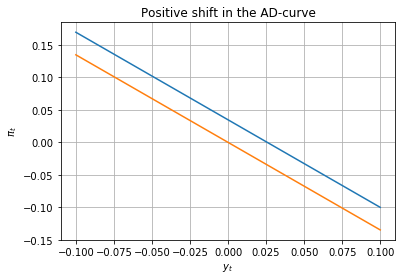

In [31]:
#Creating a shift in the AD curve
AD_plot1=ADcurve(0.5, 5.76, y, 0.1, 0.5)

y = np.linspace(-0.1,0.1,100)
plt.plot(y,AD_plot1,label='AD1')
plt.plot(y,AD_plot,label='AD0')
plt.grid(True)

plt.title('Positive shift in the AD-curve')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')

It is noticed, that for any given value of $y_t$,  $\pi_t$ is now at a higher value, than prior to the shift in the AD curve. Therefore, we can conlude, that in the new equilibrium, both $y_t$ and  $\pi_t$ will be at higher values.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [32]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In order to see how the economy will evolve, the processes(AR) are first defined.

In [33]:
#Defining processes
def v_func(vt_1, x):
    return par['delta']*vt_1+x

def s_func(st_1,c):
    return par['omega']*st_1+c

In [34]:
y_lambdified = sm.lambdify((pit_1, st, vt, phi, st_1, yt_1), ytstar1)
pi_lambdified = sm.lambdify((pit_1, st, yt, phi, st_1, yt_1), pitstar1)

Now, a simulation with 100 periods will be run, where vectors without substance will be created in order to compensate, which will be filled through loops.

In [35]:
T=100

#Simulating allocated data
y = [0]
pi = [0]
v = [0]
s = [0]
c = np.zeros(T)
x = np.zeros(T)
x[1] = 0.1

for t in range(1,T):
    v.append(v_func(v[t-1], x[t]))
    s.append(s_func(s[t-1], c[t])) 
    y.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))
    pi.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v[t],s[t],pi[t-1],y[t-1],s[t-1]))

Now, the output gap over 100 periods will be illustrated.

Text(0, 0.5, '$y$')

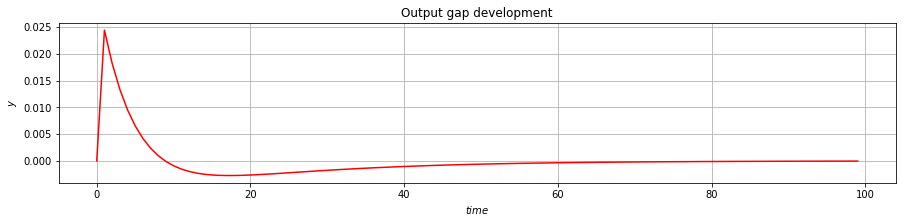

In [36]:
plot = plt.figure(figsize=(15,10))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(y,label='$\y$',color = "r")
ax.set_title('Output gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$y$')

We see a spike in the gap, which occurs at (0.1,0.024.). This is in correspondence with a shock in the demand, which results in a increase in the output. However, we see the gap stabilizing over time, which can be corresponded back to that we have $x_t$ = 0.

Next up is the illustration for the inflation gap, also for 100 periods.

Text(0, 0.5, '$\\pi$')

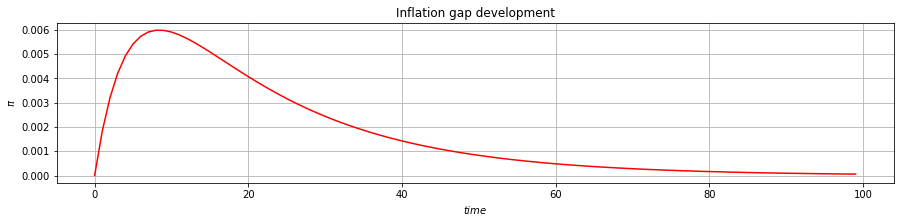

In [37]:
plot = plt.figure(figsize=(15,10))
ax = plot.add_subplot(311)
plt.grid(True)

ax.plot(pi,label='$\pi$',color = "r")
ax.set_title('Inflation gap development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi$')

We see a smiliar response, with a spike followed by a stabilizing curve.
What both grahps share, is that they both converge towards 0, and both spikes are caused by shocks in supply or demand.

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [38]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

First things first, we create a simulation of the AS-AD model, for 1000 periods.

In order to do this, we do first need to define the functions.

In [39]:
#Setting periods
np.random.seed(12345)   
T=1000

#Creating shocks 
x1 = np.random.normal(loc=0,scale=par['sigma_x'],size=T)
c1 = np.random.normal(loc=0,scale=par['sigma_c'],size=T)


#Allocating data
y1 = [0]
pi1 = [0]
v1 = [0]
s1 = [0]
x[1] = 0.1

for t in range(1,T): 
    v1.append(v_func(v1[t-1], x1[t]))
    s1.append(s_func(s1[t-1], c1[t]))
    y1.append(yt_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))
    pi1.append(pit_eq(par['alpha'], par['h'],par['b'],par['phi'],par['gamma'],v1[t],s1[t],pi1[t-1],y1[t-1],s1[t-1]))

Now, we can illustrate the model.

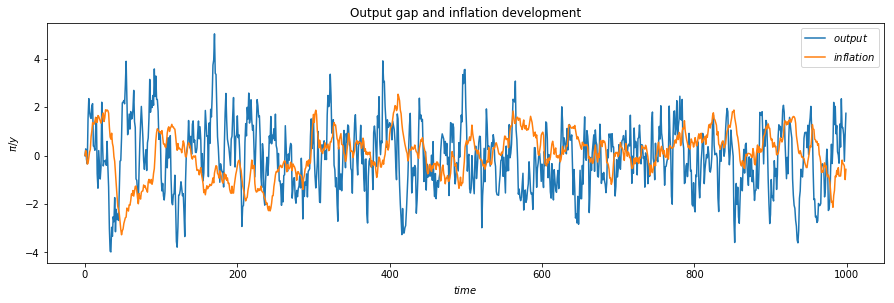

In [40]:
plot = plt.figure(figsize=(15,15))
ax = plot.add_subplot(311)

ax.plot(y1,label='$output$')
ax.plot(pi1,label='$inflation$')

ax.set_title('Output gap and inflation development')
ax.set_xlabel('$time$')
ax.set_ylabel('$\pi/y$')
ax.legend(loc='upper right');

Now we move on to calcuating the statistics.

1. Variance of $y_t$, $var(y_t)$

In [41]:
y_var=np.var(y1)
y_var

In [42]:
print(f'Variance of y is, {y_var:.2}')

Variance of y is, 1.9


2. Variance of $\pi_t$, $var(\pi_t)$

In [43]:
pi_var=np.var(pi1)
pi_var

In [44]:
print(f'Variance of pi is, {pi_var:.2}')

Variance of pi is, 0.86


3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$

In [45]:
np.corrcoef(y1,pi1)

array([[ 1.        , -0.17556771],
       [-0.17556771,  1.        ]])

In [46]:
print(f'Correlation between y and pi is, {np.corrcoef(y1,pi1)[0,1]:.2}')

Correlation between y and pi is, -0.18


4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$

In the previous 3 cases, it was just plug and play. However, we need to take the auto-correlation into account here, which means we have to defining a function for is.

In [47]:
#Defining function
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

#Fining the autocorrelation
autocorr(y1)

array([[1.        , 0.78020678],
       [0.78020678, 1.        ]])

In [48]:
print(f'Autocorrelation in y is, {autocorr(pi1)[0,1]:.2}')

Autocorrelation in y is, 0.97


5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

Since we defined the function prior to this question, we can just plug it in.

In [49]:
autocorr(pi1)

array([[1.       , 0.9720786],
       [0.9720786, 1.       ]])

In [50]:
print(f'Autocorrelation in pi is, {autocorr(y1)[0,1]:.2}')

Autocorrelation in pi is, 0.78


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

To answer this question, a simulation which will run different values for the output gap, and different values for the inflation gap will be implemented.

In [51]:
#Seed
T=1000                                                          
x_3_vec = np.random.normal(scale=par['sigma_x'], loc=0, size=T) 
c_3_vec = np.random.normal(scale=par['sigma_c'], loc=0, size=T) 

As the seed has been set, we now move on to defining the simulation.

In [52]:
#Defining simulation
def simulate_phi(phi):
    #Vectors
    v_3_vec = [0]                        
    s_3_vec = [0]
    y_3_vec = [0]
    pi_3_vec = [0]
    
    #Range
    for t in range(1,T):
        v_3_vec.append(v(v_3_vec[t-1], x_3_vec[t]))
        s_3_vec.append(s(s_3_vec[t-1], c_3_vec[t]))
        y_3_vec.append(y_star1(par['alpha'], par['b'],par['gamma'],par['h'],phi,y_3_vec[t-1],s_3_vec[t-1],pi_3_vec[t-1],s_3_vec[t],v_3_vec[t]))
        pi_3_vec.append(pi_star1(par['alpha'], par['b'],par['gamma'],par['h'],phi,y_3_vec[t-1],s_3_vec[t-1],pi_3_vec[t-1],s_3_vec[t],v_3_vec[t]))
    corr_2_y_pi = np.corrcoef(y_3_vec,pi_3_vec)[0,1]
    return corr_2_y_pi

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [53]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$



In order to answer this question, 3 plots will be illustrated

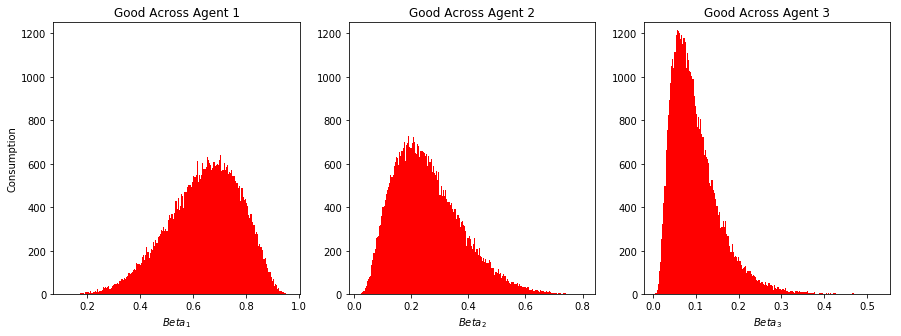

In [54]:
#Plotting histograms
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
ax.hist(betas[:,0],bins=200,histtype='bar',color = "r")
ax.set_xlabel('$Beta_1$')
ax.set_ylabel('Consumption')
ax.set_title('Good Across Agent 1')
ax.set_ylim([0, 1250])

ax = fig.add_subplot(1,3,2)
ax.hist(betas[:,1],bins=200,histtype='bar',color = "r")
ax.set_xlabel('$Beta_2$')
ax.set_title('Good Across Agent 2')
ax.set_ylim([0, 1250])

ax = fig.add_subplot(1,3,3)
ax.hist(betas[:,2],bins=200,histtype='bar',color = "r")
ax.set_xlabel('$Beta_3$')
ax.set_title('Good Across Agent 3')
ax.set_ylim([0, 1250]);

**Question 2:** Plot the excess demand functions.

In order to do this question, the functions will first be defined, and then plotted.

In [55]:
#Defining demand functions, p3=1
def demand_good1(p1,p2,e1,e2,e3,betas):
    I = e1*p1+e2*p2+e3
    return betas[:,0]*I/p1

def demand_good2(p1,p2,e1,e2,e3,betas):
    I = e1*p1+e2*p2+e3
    return betas[:,1]*I/p2

def demand_good3(p1,p2,e1,e2,e3,betas):
    I = e1*p1+e2*p2+e3
    return betas[:,2]*I

#Defining excess demand functions
def excess1(p1,p2,e1,e2,e3,betas):
    demand = np.sum(demand_good1(p1,p2,e1,e2,e3,betas))
    supply = np.sum(e1)
    excess1 = demand - supply
    return excess1

def excess2(p1,p2,e1,e2,e3,betas):
    demand = np.sum(demand_good2(p1,p2,e1,e2,e3,betas))
    supply = np.sum(e2)
    excess2 = demand - supply
    return excess2

#Defining array of prices
p1_s = np.linspace(0.1,10,100)
p2_s = np.linspace(0.1,10,100)

#Grids for excess demand
excess_grid1 = np.empty((100,100))
excess_grid2 = np.empty((100,100))

#Transforming price-vectors
p1_grid, p2_grid = np.meshgrid(p1_s,p2_s,indexing='ij')

#Calculations
for i,p1 in enumerate(p1_s):
    for j,p2 in enumerate(p2_s):
        excess_grid1[i,j] = excess1(p1,p2,e1,e2,e3,betas)
        excess_grid2[i,j] = excess2(p1,p2,e1,e2,e3,betas)

Now, the plots will be illustrated

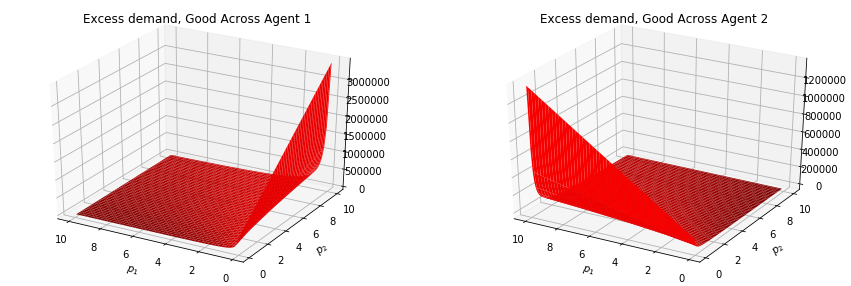

In [56]:
# We can now plot our results
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(p1_grid, p2_grid, excess_grid1,color = "r")
ax.invert_xaxis()
ax.set_title('Excess demand, Good Across Agent 1')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(p1_grid, p2_grid, excess_grid2,color = "r")
ax.invert_xaxis()
ax.set_title('Excess demand, Good Across Agent 2')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$');

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

In order to answer this question, the tatonnement will first be defined, thereafter the demands will be calculated.

In [57]:
def tatonnement(p1,p2,e1,e2,e3,betas,tol=1e-7,kappa=0.2,prints=True):
  #Defining initial excess demands
    z_1 = excess1(p1,p2,e1,e2,e3,betas)
    z_2 = excess2(p1,p2,e1,e2,e3,betas)
    t = 1 #Iteration counter

   
    
    #The loop
    while t < 12500:
        
        #Calculating initial excess demands
        z_1 = excess1(p1,p2,e1,e2,e3,betas)
        z_2 = excess2(p1,p2,e1,e2,e3,betas)

        #Tolerance level
        if abs(z_1)<tol and abs(z_2)<tol:
            if prints:
                print(f'\nIn the Walras equilibrium we have: p1 = {p1:.2f} and p2 = {p2:.2f}')
            p1_eq = p1
            p2_eq = p2
            return p1_eq, p2_eq

        #No convergence
        else:
            p1 += kappa*z_1/N
            p2 += kappa*z_2/N

        #Iteration  
        if prints:
            if t <= 10 or t%1000==0:
                print(f'Iter {t:6.0f}: Excess good 1 = {z_1:10.2f}, Excess good 2 = {z_2:10.2f} => p1 = {p1:10.2f}, p2 = {p2:10.2f}')

        t += 1
        
    #Printing based on outcome
    if t == 12500: 
        text = 'No convergence \n'
        print(text)
        return None, None

In order to actually find the walras-equilibrium prices, an estimated guess will be taken, and then the function will be called to actually find a result.

In [58]:
#Guess
p1 = 5
p2 = 1

#Calling function
p1_eq, p2_eq = tatonnement(p1,p2,e1,e2,e3,betas)

Iter      1: Excess good 1 =   -5009.04, Excess good 2 =   40450.64 => p1 =       4.98, p2 =       1.16
Iter      2: Excess good 1 =   -3919.95, Excess good 2 =   29459.03 => p1 =       4.96, p2 =       1.28
Iter      3: Excess good 1 =   -3118.04, Excess good 2 =   23192.52 => p1 =       4.95, p2 =       1.37
Iter      4: Excess good 1 =   -2482.75, Excess good 2 =   19014.91 => p1 =       4.94, p2 =       1.45
Iter      5: Excess good 1 =   -1960.44, Excess good 2 =   15991.63 => p1 =       4.93, p2 =       1.51
Iter      6: Excess good 1 =   -1521.24, Excess good 2 =   13688.79 => p1 =       4.93, p2 =       1.57
Iter      7: Excess good 1 =   -1146.30, Excess good 2 =   11872.04 => p1 =       4.92, p2 =       1.61
Iter      8: Excess good 1 =    -822.76, Excess good 2 =   10401.69 => p1 =       4.92, p2 =       1.66
Iter      9: Excess good 1 =    -541.35, Excess good 2 =    9188.39 => p1 =       4.92, p2 =       1.69
Iter     10: Excess good 1 =    -295.10, Excess good 2 =    8171

Here we see that, the Walras equilibrium in this case is 6.49 for p1, and 2.62 for p2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

In order to plot the distribution of utility within the walras euquilibrium, we again first define the functions, and then calculate its variance, whereafter it is illustrated.

In [59]:
def u(p1, p2, e1, e2, e3, betas, gamma):

    #Definig income
    I = p1*e1+p2*e2+e3
    
    #Defining demand
    demand1 = betas[:,0]*(I/p1)
    demand2 = betas[:,1]*(I/p2)
    demand3 = betas[:,2]*I
    
    #Calculating utility
    u = (demand1**betas[:,0]+demand2**betas[:,1]+demand3**betas[:,2])**gamma
    return u

Now, a function which creates a given vector of our given utilites is constructed.

In [60]:
#Defining the function
u_vec = u(p1_eq, p2_eq, e1, e2, e3, betas, gamma)

#Mean and Variance
mean = np.mean(u_vec)
var = np.var(u_vec)
print(f'Mean: {mean:.2f}')
print(f'Variance: {var:.2f}')

Mean: 2.38
Variance: 0.21


And finally, we can now plot the distribution fo the utilies.

Text(0, 0.5, 'Consumers')

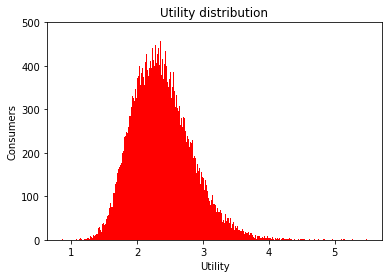

In [61]:
#Plot
plt.hist(u_vec, bins=500,color = "r")
plt.title('Utility distribution')
plt.xlabel('Utility')
plt.ylabel('Consumers')

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

Here we will call to the same tatonnement in question 3.

In [62]:
e1_new = np.ones(N)*np.mean(e1)
e2_new = np.ones(N)*np.mean(e2)
e3_new = np.ones(N)*np.mean(e3)

In [63]:
p1 = 5
p2 = 1

p1_new, p2_new = tatonnement(p1,p2,e1_new,e2_new,e3_new,betas)

Iter      1: Excess good 1 =   -5020.74, Excess good 2 =   40503.83 => p1 =       4.98, p2 =       1.16
Iter      2: Excess good 1 =   -3930.11, Excess good 2 =   29491.20 => p1 =       4.96, p2 =       1.28
Iter      3: Excess good 1 =   -3127.21, Excess good 2 =   23215.68 => p1 =       4.95, p2 =       1.37
Iter      4: Excess good 1 =   -2491.16, Excess good 2 =   19032.95 => p1 =       4.94, p2 =       1.45
Iter      5: Excess good 1 =   -1968.23, Excess good 2 =   16006.34 => p1 =       4.93, p2 =       1.51
Iter      6: Excess good 1 =   -1528.51, Excess good 2 =   13701.13 => p1 =       4.93, p2 =       1.57
Iter      7: Excess good 1 =   -1153.11, Excess good 2 =   11882.60 => p1 =       4.92, p2 =       1.62
Iter      8: Excess good 1 =    -829.18, Excess good 2 =   10410.87 => p1 =       4.92, p2 =       1.66
Iter      9: Excess good 1 =    -547.41, Excess good 2 =    9196.44 => p1 =       4.92, p2 =       1.69
Iter     10: Excess good 1 =    -300.84, Excess good 2 =    8178

It is noticed, that the prices in this case is the excat same as in q3.

Now, a new funtion is defined, to calculate the new means and variances, which is required in order to plot the difference in gamma.

In [64]:
def u_new(p1, p2, e1, e2, e3, betas, gamma):

    #Definig income
    I = p1*e1+p2*e2+e3
    
    #Defining demand
    demand1_new = betas[:,0]*(I/p1)
    demand2_new = betas[:,1]*(I/p2)
    demand3_new = betas[:,2]*I
    
    #Calculating utility
    u = (demand1_new**betas[:,0]+demand2_new**betas[:,1]+demand3_new**betas[:,2])**gamma
    return u_new

The function in order to create the vector of utilites is now defined, along with finding the new mean and variance.

In [65]:
#Defining funtion
u_vec_new = u(p1_eq, p2_eq, e1, e2, e3, betas, 1.5)

#New mean and variance
mean = np.mean(u_vec_new)
var = np.var(u_vec_new)
print(f'Mean: {mean:.2f}')
print(f'Variance: {var:.2f}')

Mean: 5.22
Variance: 3.71


This tells us, that even to unchanged prices, gamma will influence the mean and variance values. We see an 0.7 increase in gamma, which results in a 2.84 incerase in mean, and a flat 3.5 increase in variance.

Now, the distribution of utility is illustrated.

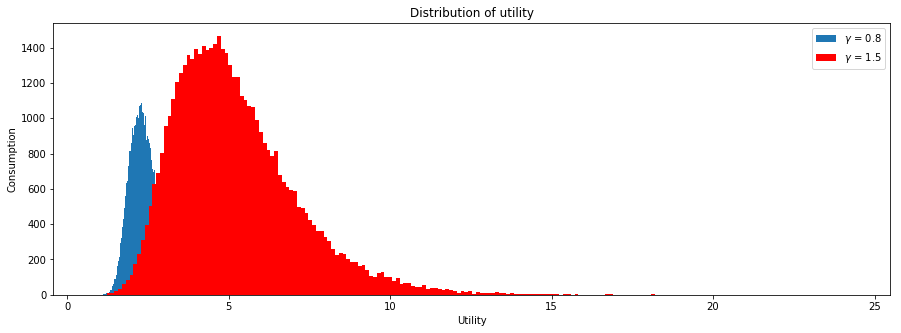

In [66]:
fig = plt.figure(figsize=(15,5))
plt.hist(u_vec, bins=200, label='$\gamma$ = 0.8')
plt.hist(u_vec_new, bins=200, color='red', label='$\gamma$ = 1.5')
plt.legend()
plt.title('Distribution of utility')
plt.xlabel('Utility')
plt.ylabel('Consumption');

This makes it unquestionable, that gamma indeed does play a role.